In [4]:
from pybaseball import statcast
from pybaseball.plotting import spraychart
import pandas as pd

In [5]:
# Download Statcast data for the entire period ONE TIME
print("Downloading Statcast data...")
data = statcast(start_dt="2023-04-01", end_dt="2023-10-01")
print("Statcast data downloaded successfully.")

This is a large query, it may take a moment to complete


/home/pain/git/Sacrifice-Fly-Modeling/.venv/lib/python3.13/site-packages/pybaseball/statcast.py:50: UserWarning: 
That's a nice request you got there. It'd be a shame if something were to happen to it.
We strongly recommend that you enable caching before running this. It's as simple as `pybaseball.cache.enable()`.
Since the Statcast requests can take a *really* long time to run, if something were to happen, like: a disconnect;
gremlins; computer repair by associates of Rudy Giuliani; electromagnetic interference from metal trash cans; etc.;
you could lose a lot of progress. Enabling caching will allow you to immediately recover all the successful
subqueries if that happens.
  warnings.warn(_OVERSIZE_WARNING)
  0%|          | 0/184 [00:00<?, ?it/s]/home/pain/git/Sacrifice-Fly-Modeling/.venv/lib/python3.13/site-packages/pybaseball/datahelpers/postprocessing.py:59: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and

Statcast data downloaded successfully.



--- Ball Landings - Unfiltered (All Events) ---
Dodger Stadium Ball Landings (Unfiltered) in 2023: 3991
Yankee Stadium Ball Landings (Unfiltered) in 2023: 3972


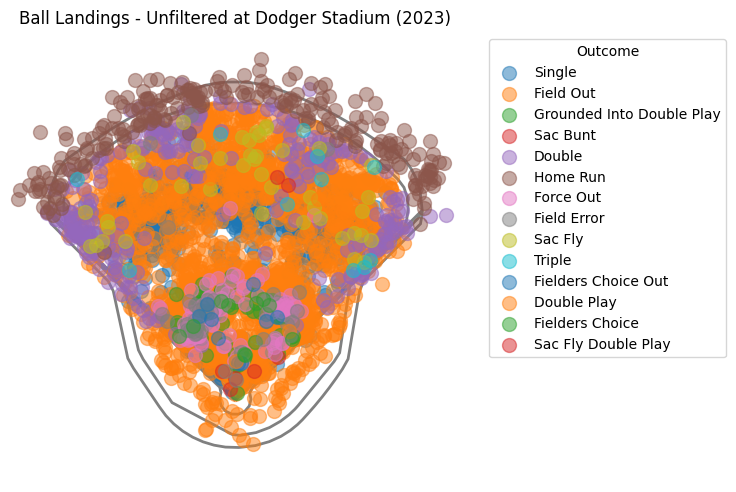

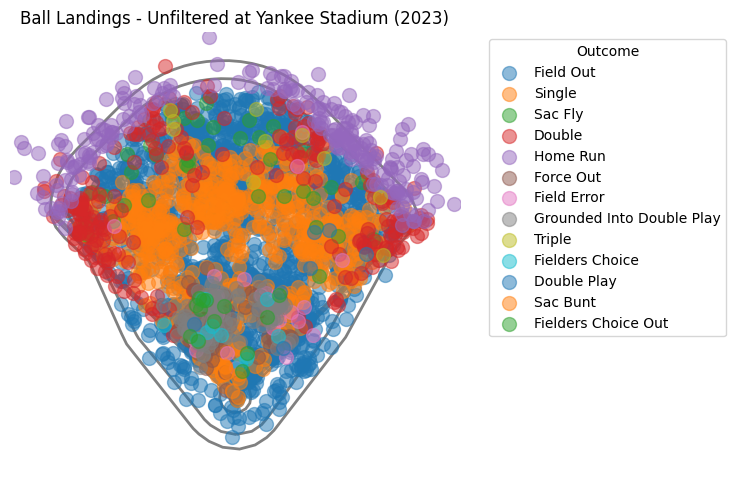

<Axes: title={'center': 'Ball Landings - Unfiltered at Yankee Stadium (2023)'}>

In [6]:
# --- 1. Ball Landings - Unfiltered (All Events) ---
print("\n--- Ball Landings - Unfiltered (All Events) ---")
ball_landings = data.copy()
ball_landings['hc_x'] = pd.to_numeric(ball_landings['hc_x'], errors='coerce')
ball_landings['hc_y'] = pd.to_numeric(ball_landings['hc_y'], errors='coerce')
ball_landings = ball_landings.dropna(subset=['hc_x', 'hc_y'])

dodger_landings_all = ball_landings[ball_landings['home_team'] == 'LAD']
yankee_landings_all = ball_landings[ball_landings['home_team'] == 'NYY']

print("Dodger Stadium Ball Landings (Unfiltered) in 2023:", len(dodger_landings_all))
print("Yankee Stadium Ball Landings (Unfiltered) in 2023:", len(yankee_landings_all))
spraychart(dodger_landings_all, 'dodgers', title='Ball Landings - Unfiltered at Dodger Stadium (2023)')
spraychart(yankee_landings_all, 'yankees', title='Ball Landings - Unfiltered at Yankee Stadium (2023)')



--- Caught by an Outfielder (Based on hit_location) ---
Dodger Stadium Balls Caught by Outfielders in 2023: 1903
Yankee Stadium Balls Caught by Outfielders in 2023: 1828


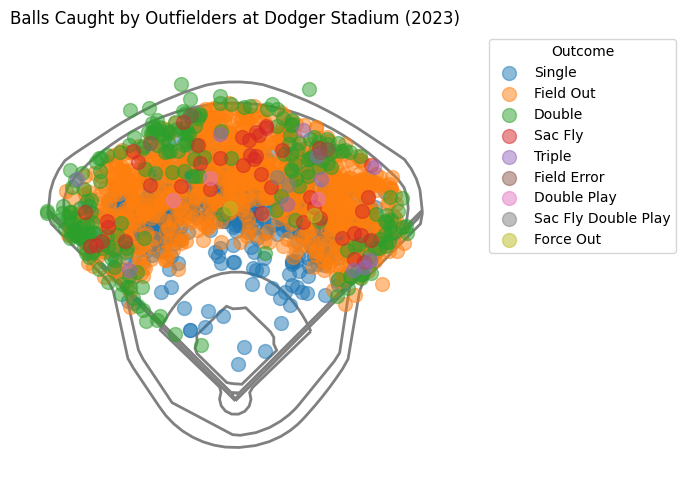

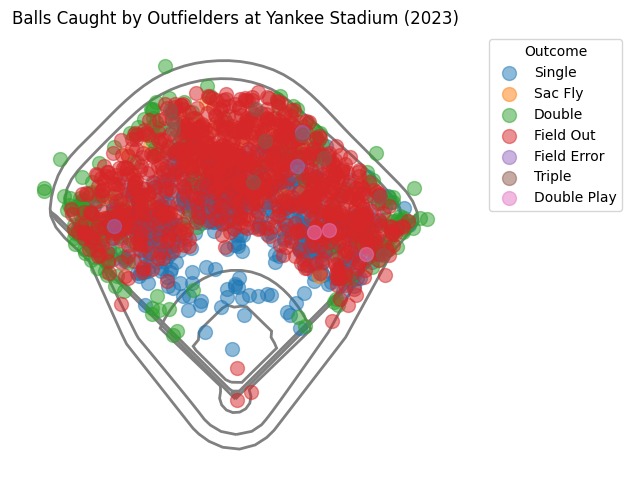

<Axes: title={'center': 'Balls Caught by Outfielders at Yankee Stadium (2023)'}>

In [7]:
# --- 2 Caught by an Outfielder (Based on hit_location) ---
print("\n--- Caught by an Outfielder (Based on hit_location) ---")
outfielder_caught = data[data['hit_location'].isin([7.0, 8.0, 9.0])].copy() # Using floats for comparison
outfielder_caught['hc_x'] = pd.to_numeric(outfielder_caught['hc_x'], errors='coerce')
outfielder_caught['hc_y'] = pd.to_numeric(outfielder_caught['hc_y'], errors='coerce')
outfielder_caught = outfielder_caught.dropna(subset=['hc_x', 'hc_y', 'hit_location']) # Ensure hit_location is not NaN

dodger_of_caught = outfielder_caught[outfielder_caught['home_team'] == 'LAD']
yankee_of_caught = outfielder_caught[outfielder_caught['home_team'] == 'NYY']

print("Dodger Stadium Balls Caught by Outfielders in 2023:", len(dodger_of_caught))
print("Yankee Stadium Balls Caught by Outfielders in 2023:", len(yankee_of_caught))
spraychart(dodger_of_caught, 'dodgers', title='Balls Caught by Outfielders at Dodger Stadium (2023)')
spraychart(yankee_of_caught, 'yankees', title='Balls Caught by Outfielders at Yankee Stadium (2023)')


--- Outs Caught by an Outfielder (Based on hit_location and event) ---
Dodger Stadium Outs Caught by Outfielders in 2023: 1041
Yankee Stadium Outs Caught by Outfielders in 2023: 995


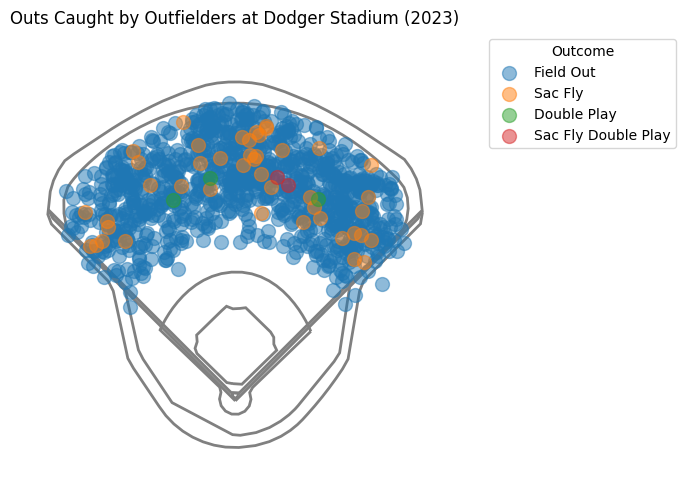

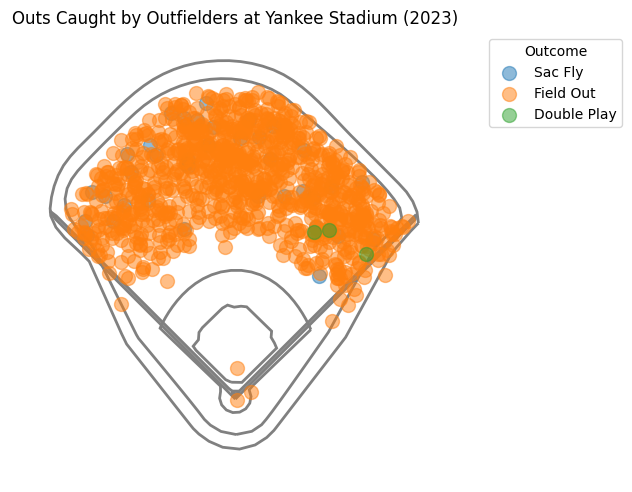

<Axes: title={'center': 'Outs Caught by Outfielders at Yankee Stadium (2023)'}>

In [9]:
# --- 3. Outs Caught by an Outfielder (Based on hit_location and event) ---
print("\n--- Outs Caught by an Outfielder (Based on hit_location and event) ---")
outfielder_outs = data[
    (data['hit_location'].isin([7.0, 8.0, 9.0])) &
    (data['events'].isin([
        'field_out',
        'sac_fly',
        'double_play',
        'sac_fly_double_play'
    ]))
].copy()
outfielder_outs['hc_x'] = pd.to_numeric(outfielder_outs['hc_x'], errors='coerce')
outfielder_outs['hc_y'] = pd.to_numeric(outfielder_outs['hc_y'], errors='coerce')
outfielder_outs = outfielder_outs.dropna(subset=['hc_x', 'hc_y', 'hit_location'])

dodger_of_outs = outfielder_outs[outfielder_outs['home_team'] == 'LAD']
yankee_of_outs = outfielder_outs[outfielder_outs['home_team'] == 'NYY']

print("Dodger Stadium Outs Caught by Outfielders in 2023:", len(dodger_of_outs))
print("Yankee Stadium Outs Caught by Outfielders in 2023:", len(yankee_of_outs))
spraychart(dodger_of_outs, 'dodgers', title='Outs Caught by Outfielders at Dodger Stadium (2023)')
spraychart(yankee_of_outs, 'yankees', title='Outs Caught by Outfielders at Yankee Stadium (2023)')


--- Outs Caught by an Outfielder with Game State Filters ---
Dodger Stadium Outs Caught by OF ( < 2 outs, runner on 3rd) in 2023: 59
Yankee Stadium Outs Caught by OF ( < 2 outs, runner on 3rd) in 2023: 43


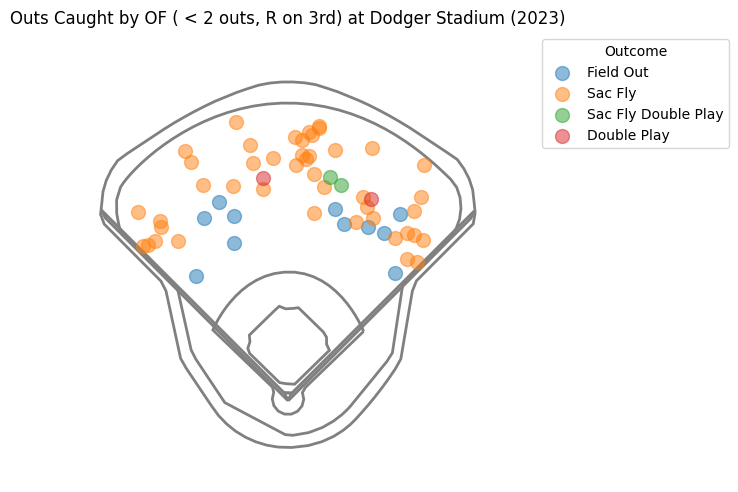

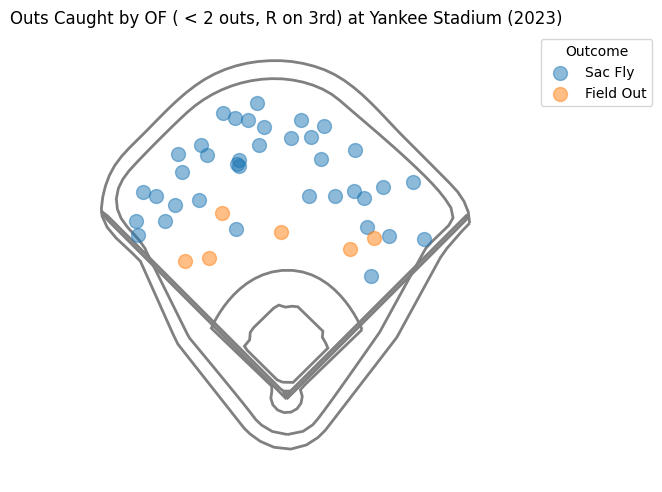

<Axes: title={'center': 'Outs Caught by OF ( < 2 outs, R on 3rd) at Yankee Stadium (2023)'}>

In [10]:
# --- 3. Outs Caught by an Outfielder with Game State Filters ---
print("\n--- Outs Caught by an Outfielder with Game State Filters ---")
outfielder_outs_state = data[
    (data['hit_location'].isin([7.0, 8.0, 9.0])) &
    (data['events'].isin([
        'field_out',
        'sac_fly',
        'double_play',
        'sac_fly_double_play'
    ])) &
    (data['outs_when_up'] < 2) &
    (data['on_3b'].notnull())
].copy()
outfielder_outs_state['hc_x'] = pd.to_numeric(outfielder_outs_state['hc_x'], errors='coerce')
outfielder_outs_state['hc_y'] = pd.to_numeric(outfielder_outs_state['hc_y'], errors='coerce')
outfielder_outs_state = outfielder_outs_state.dropna(subset=['hc_x', 'hc_y', 'hit_location'])

dodger_of_outs_state = outfielder_outs_state[outfielder_outs_state['home_team'] == 'LAD']
yankee_of_outs_state = outfielder_outs_state[outfielder_outs_state['home_team'] == 'NYY']

print("Dodger Stadium Outs Caught by OF ( < 2 outs, runner on 3rd) in 2023:", len(dodger_of_outs_state))
print("Yankee Stadium Outs Caught by OF ( < 2 outs, runner on 3rd) in 2023:", len(yankee_of_outs_state))
spraychart(dodger_of_outs_state, 'dodgers', title='Outs Caught by OF ( < 2 outs, R on 3rd) at Dodger Stadium (2023)')
spraychart(yankee_of_outs_state, 'yankees', title='Outs Caught by OF ( < 2 outs, R on 3rd) at Yankee Stadium (2023)')